In [104]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [105]:
from experiments import *

In [106]:
target_dir = 'local_results'
n_samples_list = [10000]
dgp = 4
sample_its = 1
n_jobs = -1
gcv = True

In [ ]:
X, y, true_reg, true_prop = gen_data(dgp, 1, n_samples_list[0])

In [ ]:
plt.scatter(X[:, 1], true_prop)
plt.show()

In [53]:
# advkernel_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, kernelid=2, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# auto_advkernel_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
splin_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# pluginlg_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# pluginrf_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# nystrom_advkernel_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, kernelid=2, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# rf_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)
# nnet_experiments(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its, n_jobs=n_jobs, gcv_reg=gcv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 33.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.4min finished


In [54]:
res = [# advkernel_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    # auto_advkernel_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    splin_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    pluginlg_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    pluginrf_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    nystrom_advkernel_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    rf_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
    nnet_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its),
]

In [55]:
import pandas as pd
table = pd.concat(res, axis=1, sort=True)
display(table)

auto_advrkhs  auto_advrkhs_cfit
n=1000 bias            0.002143           0.008053
       ci_length       0.322448           0.424609
       cov             0.970000           0.990000
       reg_rmse        0.468312           0.476455
       reisz_rmse      0.940072           1.354530
       rmse            0.082971           0.085883

In [164]:
table

,metric,auto_advrkhs_cfit,splin_cfit,nysadvrkhs_cfit,rfreisz_cfit,pluginlg_cfit,pluginrf_cfit
0,bias,-0.038838,-0.078940,-0.033233,-0.005279,-0.121074,-0.010097
1,ci_length,0.633835,0.383961,0.323473,0.386075,0.539982,0.294598
2,cov,0.910000,0.800000,0.830000,0.920000,0.830000,0.760000
3,reg_rmse,0.274438,0.274438,0.274438,0.274438,0.274438,0.274438
4,reisz_rmse,3.117530,2.162516,2.363848,1.559496,2.176679,1.596231
5,rmse,0.147811,0.156950,0.143271,0.130469,0.192028,0.136868


In [ ]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(table.to_latex(bold_rows=True, multirow=True))

In [190]:
table = table.loc[:, [col.endswith('_cfit') for col in table2.columns]].reset_index().drop(['level_0'], axis=1).rename({'level_1':'metric'}, axis=1).set_index('metric')
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(table.to_latex(bold_rows=True, multirow=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  auto\_advrkhs\_cfit &  splin\_cfit &  nysadvrkhs\_cfit &  rfreisz\_cfit &  pluginlg\_cfit &  pluginrf\_cfit \\
\textbf{metric    } &                    &             &                  &               &                &                \\
\midrule
\textbf{bias      } &               0.58 &        0.61 &             0.60 &          0.70 &           0.54 &           0.59 \\
\textbf{ci\_length } &               1.20 &        1.00 &             0.96 &          0.99 &           1.28 &           0.84 \\
\textbf{cov       } &               0.54 &        0.31 &             0.31 &          0.25 &           0.50 &           0.21 \\
\textbf{reg\_rmse  } &               0.43 &        0.43 &             0.43 &          0.43 &           0.43 &           0.43 \\
\textbf{reisz\_rmse} &               2.93 &        2.35 &             2.72 &          2.90 &           2.26 &           2.21 \\
\textbf{rmse      } &               0.64 &        0.67 &             0.66 &

In [10]:
from experiments import gen_data
from sklearn.linear_model import LassoCV
from joblib import Parallel, delayed

def direct(i):
    return LassoCV().fit(*(gen_data(3, i + 1, 500)[:2])).coef_[0]

res = np.array(Parallel(n_jobs=-1, verbose=3)(delayed(direct)(i) for i in range(100)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


In [11]:
np.mean(res)

2.4045195587046946

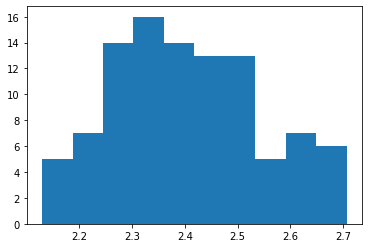

In [12]:
import matplotlib.pyplot as plt
plt.hist(res)
plt.show()

In [138]:
res = np.array(joblib.load(f'local_results/rf_5fold_cfit_{dgp}_n_{1000}_{1}_{100}.jbl'))

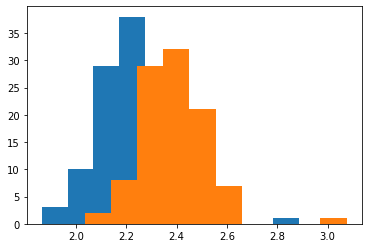

In [139]:
import matplotlib.pyplot as plt
plt.hist(np.array(res)[:, 0])
plt.hist(np.array(res)[:, 2])
plt.show()

In [140]:
np.mean(np.array(res)[:, 0])

2.194720651064218

In [141]:
np.mean((np.array(res)[:, 2] - np.array(res)[:, 0]) / 1.96)

0.09848855409912666

In [142]:
np.std(np.array(res)[:, 0])

0.1303618880086285

In [143]:
stderr = (res[:, 2] - res[:, 0]) / 1.96

In [ ]:
np.mean(res[:, 0] + 2.5)

(array([44., 45.,  5.,  2.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([0.09051186, 0.15242013, 0.2143284 , 0.27623667, 0.33814495,
        0.40005322, 0.46196149, 0.52386976, 0.58577803, 0.64768631,
        0.70959458]),
 <BarContainer object of 10 artists>)

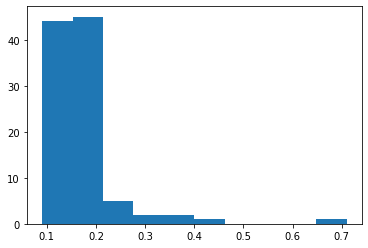

In [136]:
plt.hist(stderr)

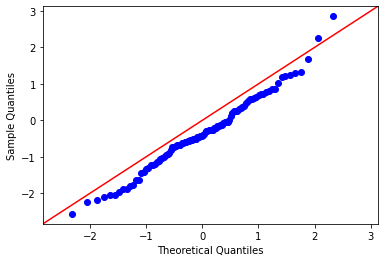

In [137]:
from statsmodels.api import qqplot
qqplot((res[:, 0] - 2.2) / stderr, line='45')
plt.show()

In [145]:
# rkhs = advkernel_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its)
res = {}
gcv = 1
for dgp in [0]:
    res[f'dgp={dgp}'] = []
    for n_samples in [100, 200, 500, 1000, 2000]:
        allmethods = []
        for method, fn in [(1, auto_advkernel_postprocess),
                           (2, splin_postprocess),
                           (3, pluginlg_postprocess),
                           (4, pluginrf_postprocess),
                           (5, nystrom_advkernel_postprocess),
                           (6, rf_postprocess),
                           (8, nnet_postprocess)
                          ]:
            target_dir = os.path.join('amlt', 'hardy-blowfish',
                                      f'kernel_{n_samples}_{dgp}_2_{method}_1_100_{gcv}')
            allmethods.append(fn([n_samples], dgp=dgp, target_dir=target_dir, sample_its=100))

        res[f'dgp={dgp}'].append(pd.concat(allmethods, axis=1, sort=True))
    res[f'dgp={dgp}'] = pd.concat(res[f'dgp={dgp}'], axis=0, sort=True)

In [146]:
pd.concat(res, axis=0)

auto_advrkhs  auto_advrkhs_cfit      nnet  nnet_cfit  \
dgp=0 n=100  bias           -0.001433           0.016103 -0.094313  -0.112363   
             ci_length       0.956655           1.126361  0.300497   0.334894   
             cov             0.950000           0.960000  0.450000   0.480000   
             reg_rmse        0.528212           0.589766  0.528212   0.589766   
             reisz_rmse      1.410805           1.548452  1.754758   1.882729   
             rmse            0.268363           0.288021  0.266234   0.292200   
      n=200  bias            0.013373           0.035569 -0.055309  -0.054826   
             ci_length       0.726521           0.978820  0.342338   0.330429   
             cov             0.940000           0.960000  0.610000   0.550000   
             reg_rmse        0.495748           0.528281  0.495748   0.528281   
             reisz_rmse      1.451439           1.861830  1.392650   1.544870   
             rmse            0.203295           0.253457  0.188900   0.198437   
      n=500  bias           -0.025554           0.008701 -0.056829  -0.053242   
             ci_length       0.426413           0.643761  0.326646   0.339643   
             cov             0.920000           0.980000  0.790000   0.830000   
             reg_rmse        0.476762           0.493461  0.476762   0.493461   
             reisz_rmse      1.151146           1.721096  1.016603   1.071939   
             rmse            0.126024           0.143973  0.128991   0.131078   
      n=1000 bias            0.011268           0.020987 -0.001343   0.002712   
             ci_length       0.270882           0.407278  0.268202   0.316754   
             cov             0.880000           0.960000  0.850000   0.910000   
             reg_rmse        0.378925           0.397978  0.378925   0.397978   
             reisz_rmse      0.940072           1.354530  0.910185   0.955000   
             rmse            0.092170           0.094971  0.090437   0.090529   
      n=2000 bias            0.004664           0.014654 -0.001030   0.007885   
             ci_length       0.200054           0.279530  0.198941   0.225912   
             cov             0.930000           0.970000  0.930000   0.950000   
             reg_rmse        0.277268           0.299653  0.277268   0.299653   
             reisz_rmse      0.846301           1.213253  0.781840   0.815870   
             rmse            0.056863           0.061855  0.055912   0.055598   

                         nysadvrkhs  nysadvrkhs_cfit  pluginlg  pluginlg_cfit  \
dgp=0 n=100  bias          0.012604         0.028909  0.001677      -0.009598   
             ci_length     0.857612         0.930669  0.943930       1.380787   
             cov           0.910000         0.910000  0.920000       0.950000   
             reg_rmse      0.528212         0.589766  0.528212       0.589766   
             reisz_rmse    1.184383         1.302818  0.874815       1.368219   
             rmse          0.257036         0.272837  0.246128       0.302734   
      n=200  bias         -0.002594         0.004373  0.006994       0.017108   
             ci_length     0.583797         0.625451  0.678887       0.797015   
             cov           0.880000         0.850000  0.920000       0.950000   
             reg_rmse      0.495748         0.528281  0.495748       0.528281   
             reisz_rmse    1.152806         1.209466  0.691864       0.861777   
             rmse          0.190777         0.192742  0.194713       0.205289   
      n=500  bias         -0.023736        -0.020269 -0.019954      -0.013790   
             ci_length     0.371820         0.410678  0.414349       0.479771   
             cov           0.870000         0.930000  0.920000       0.950000   
             reg_rmse      0.476762         0.493461  0.476762       0.493461   
             reisz_rmse    1.022844         1.048725  0.584527       0.666895   
             rmse          0.118810         0.111974  0

In [141]:
res = pd.concat(res, axis=0)

In [142]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(res.loc[:, [col.endswith('cfit') for col in res.columns]])

auto_advrkhs_cfit  nnet_cfit  nysadvrkhs_cfit  \
dgp=0 n=100  bias                     0.02      -0.11             0.03   
             ci_length                1.13       0.33             0.93   
             cov                      0.96       0.48             0.91   
             reg_rmse                 0.59       0.59             0.59   
             reisz_rmse               1.55       1.88             1.30   
             rmse                     0.29       0.29             0.27   
      n=200  bias                     0.04      -0.05             0.00   
             ci_length                0.98       0.33             0.63   
             cov                      0.96       0.55             0.85   
             reg_rmse                 0.53       0.53             0.53   
             reisz_rmse               1.86       1.54             1.21   
             rmse                     0.25       0.20             0.19   
      n=500  bias                     0.01      -0.05            -0.02   
             ci_length                0.64       0.34             0.41   
             cov                      0.98       0.83             0.93   
             reg_rmse                 0.49       0.49             0.49   
             reisz_rmse               1.72       1.07             1.05   
             rmse                     0.14       0.13             0.11   
      n=1000 bias                     0.02       0.00             0.03   
             ci_length                0.41       0.32             0.29   
             cov                      0.96       0.91             0.88   
             reg_rmse                 0.40       0.40             0.40   
             reisz_rmse               1.35       0.96             1.00   
             rmse                     0.09       0.09             0.09   
      n=2000 bias                     0.01       0.01             0.02   
             ci_length                0.28       0.23             0.21   
             cov                      0.97       0.95             0.91   
             reg_rmse                 0.30       0.30             0.30   
             reisz_rmse               1.21       0.82             0.97   
             rmse                     0.06       0.06             0.06   

                         pluginlg_cfit  pluginrf_cfit  rfreisz_cfit  \
dgp=0 n=100  bias                -0.01           0.05          0.09   
             ci_length            1.38           0.99          1.06   
             cov                  0.95           0.95          0.95   
             reg_rmse             0.59           0.59          0.59   
             reisz_rmse           1.37           0.84          1.44   
             rmse                 0.30           0.25          0.29   
      n=200  bias                 0.02           0.02          0.04   
             ci_length            0.80           0.65          0.66   
             cov                  0.95           0.92          0.92   
             reg_rmse             0.53           0.53          0.53   
             reisz_rmse           0.86           0.84          1.21   
             rmse                 0.21           0.19          0.20   
      n=500  bias                -0.01          -0.00         -0.01   
             ci_length            0.48           0.42          0.44   
             cov                  0.95           0.95          0.95   
             reg_rmse             0.49           0.49          0.49   
             reisz_rmse           0.67           0.69          0.92   
             rmse                 0.12           0.11          0.11   
      n=1000 bias                 0.00           0.03          0.04   
             ci_length            0.34           0.30          0.30   
             cov                  0.95           0.87          0.87   
             reg_rmse             0.40           0.40          0.40   
             reisz_rmse           0.50           0.65          0.86   
             rmse         

In [136]:
res = res.droplevel(0).drop([(f'n={n}', 'reg_rmse') for n in [100, 200, 500, 1000, 2000]])

In [137]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(res.loc[:, [col.endswith('cfit') for col in res.columns]].to_latex(bold_rows=True, multirow=True))

\begin{tabular}{llrrrrrrr}
\toprule
       &      &  auto\_advrkhs\_cfit &  nnet\_cfit &  nysadvrkhs\_cfit &  pluginlg\_cfit &  pluginrf\_cfit &  rfreisz\_cfit &  splin\_cfit \\
\midrule
\multirow{5}{*}{\textbf{n=100}} & \textbf{bias} &               0.02 &      -0.11 &             0.03 &          -0.01 &           0.05 &          0.09 &        0.01 \\
       & \textbf{ci\_length} &               1.13 &       0.33 &             0.93 &           1.38 &           0.99 &          1.06 &        1.18 \\
       & \textbf{cov} &               0.96 &       0.48 &             0.91 &           0.95 &           0.95 &          0.95 &        0.97 \\
       & \textbf{reisz\_rmse} &               1.55 &       1.88 &             1.30 &           1.37 &           0.84 &          1.44 &        1.09 \\
       & \textbf{rmse} &               0.29 &       0.29 &             0.27 &           0.30 &           0.25 &          0.29 &        0.28 \\
\cline{1-9}
\multirow{5}{*}{\textbf{n=200}} & \textbf{bias} &

In [138]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(res.loc[:, [not col.endswith('cfit') for col in res.columns]].to_latex(bold_rows=True, multirow=True))

\begin{tabular}{llrrrrrrr}
\toprule
       &      &  auto\_advrkhs &  nnet &  nysadvrkhs &  pluginlg &  pluginrf &  rfreisz &  splin \\
\midrule
\multirow{5}{*}{\textbf{n=100}} & \textbf{bias} &         -0.00 & -0.09 &        0.01 &      0.00 &      0.02 &     0.07 &   0.01 \\
       & \textbf{ci\_length} &          0.96 &  0.30 &        0.86 &      0.94 &      0.76 &     0.88 &   0.94 \\
       & \textbf{cov} &          0.95 &  0.45 &        0.91 &      0.92 &      0.89 &     0.92 &   0.94 \\
       & \textbf{reisz\_rmse} &          1.41 &  1.75 &        1.18 &      0.87 &      0.88 &     1.21 &   0.92 \\
       & \textbf{rmse} &          0.27 &  0.27 &        0.26 &      0.25 &      0.24 &     0.25 &   0.23 \\
\cline{1-9}
\multirow{5}{*}{\textbf{n=200}} & \textbf{bias} &          0.01 & -0.06 &       -0.00 &      0.01 &      0.01 &     0.02 &  -0.01 \\
       & \textbf{ci\_length} &          0.73 &  0.34 &        0.58 &      0.68 &      0.55 &     0.65 &   0.68 \\
       & \textbf{co

In [48]:
it = 1
df = pd.read_csv(f'rahul/sim_{it}.csv', index_col=0)
y = df['Y'].values
X = df[['D'] + [f'X{i}' for i in np.arange(1, 11)]].values
if n_samples is not None:
    X, y = X[:n_samples], y[:n_samples]
cov, beta = get_params(10)
true_propensity = .05 + .9 * scipy.special.expit(X[:, 1:] @ beta)
true_reg = 2.2 * X[:, 0] + 1.2 * X[:, 1:] @ beta + X[:, 0] * X[:, 1]

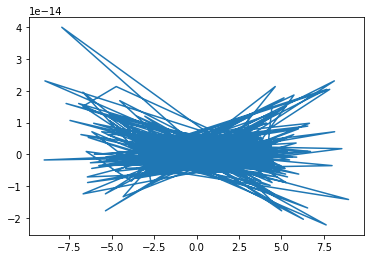

In [51]:
import matplotlib.pyplot as plt 
true_reisz = X[:, 0] / true_propensity - (1 - X[:, 0]) / (1 - true_propensity)
plt.plot(df['rr'], true_reisz)
plt.show()

In [152]:
# rkhs = advkernel_postprocess(n_samples_list, dgp=dgp, target_dir=target_dir, sample_its=sample_its)
res = {}
gcv = 0
for dgp in [1]:
    res[f'dgp={dgp}'] = []
    for n_samples in [100]:
        allmethods = []
        for method, fn in [(1, auto_advkernel_postprocess),
                           (2, splin_postprocess),
                           (3, pluginlg_postprocess),
                           (4, pluginrf_postprocess),
                           (5, nystrom_advkernel_postprocess),
                           (6, rf_postprocess),
                           (8, nnet_postprocess)
                          ]:
            target_dir = os.path.join('amlt', 'generous-vervet',
                                      f'kernel_{n_samples}_{dgp}_2_{method}_1_100')
            allmethods.append(fn([n_samples], dgp=dgp, target_dir=target_dir, sample_its=100))

        res[f'dgp={dgp}'].append(pd.concat(allmethods, axis=1, sort=True))
    res[f'dgp={dgp}'] = pd.concat(res[f'dgp={dgp}'], axis=0, sort=True)

In [153]:
res = pd.concat(res, axis=0)
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(res.loc[:, [col.endswith('cfit') for col in res.columns]])

auto_advrkhs_cfit  nnet_cfit  nysadvrkhs_cfit  \
dgp=1 n=100 bias                     0.07      -0.35             0.06   
            ci_length                0.74       0.06             0.73   
            cov                      0.90       0.03             0.88   
            reg_rmse                 0.68       0.68             0.68   
            reisz_rmse               1.18       2.28             1.20   
            rmse                     0.26       0.44             0.26   

                        pluginlg_cfit  pluginrf_cfit  rfreisz_cfit  splin_cfit  
dgp=1 n=100 bias                 0.44           0.16         -0.08        0.08  
            ci_length            2.14           0.93          1.25        0.88  
            cov                  0.92           0.91          0.83        0.93  
            reg_rmse             0.68           0.68          0.68        0.68  
            reisz_rmse           3.47           1.02          3.49        1.05  
            rmse                 0.84           0.30          0.45        0.27

In [154]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(res.droplevel([0, 1]).loc[:, [col.endswith('cfit') for col in res.columns]].to_latex(bold_rows=True, multirow=True))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  auto\_advrkhs\_cfit &  nnet\_cfit &  nysadvrkhs\_cfit &  pluginlg\_cfit &  pluginrf\_cfit &  rfreisz\_cfit &  splin\_cfit \\
\midrule
\textbf{bias      } &               0.07 &      -0.35 &             0.06 &           0.44 &           0.16 &         -0.08 &        0.08 \\
\textbf{ci\_length } &               0.74 &       0.06 &             0.73 &           2.14 &           0.93 &          1.25 &        0.88 \\
\textbf{cov       } &               0.90 &       0.03 &             0.88 &           0.92 &           0.91 &          0.83 &        0.93 \\
\textbf{reg\_rmse  } &               0.68 &       0.68 &             0.68 &           0.68 &           0.68 &          0.68 &        0.68 \\
\textbf{reisz\_rmse} &               1.18 &       2.28 &             1.20 &           3.47 &           1.02 &          3.49 &        1.05 \\
\textbf{rmse      } &               0.26 &       0.44 &             0.26 &           0.84 &           0.30 &          0.45